<a href="https://colab.research.google.com/github/danie-cp/Machine-Learning-Models/blob/main/Multiple_Linear_Regression_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hospital Staffing and Patient Satisfaction**

You are an analyst for a regional healthcare network. The data represent daily summaries from hospital units, capturing workload, staffing, and outcomes related to patient satisfaction.
Variable 	Description
SatisfactionScore 	Average patient satisfaction score (0–100) (Dependent Variable)
PatientsSeen 	Number of patients seen during the day
AvgWaitTime 	Average patient wait time (minutes)
NursesOnShift 	Number of nurses on duty
DoctorsOnShift 	Number of doctors on duty
Weekend 	Whether the data are from a weekend (Yes/No)
EmergencyLevel 	Severity of cases that day (Low, Medium, High)

In [34]:

satisfaction <- read_excel("/content/hospital_staffing_satisfaction.xlsx")
# View first few rows and summary
head(satisfaction)
summary(satisfaction)

SatisfactionScore,PatientsSeen,AvgWaitTime,NursesOnShift,DoctorsOnShift,Weekend,EmergencyLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
71.13,149,30.9,13,4,No,High
61.20,154,43.0,11,2,Yes,High
76.36,91,20.6,9,4,No,Medium
55.02,161,46.0,6,7,Yes,Low
71.20,148,37.7,18,5,Yes,Medium
71.88,250,29.4,16,3,Yes,Medium


 SatisfactionScore  PatientsSeen    AvgWaitTime    NursesOnShift  
 Min.   :54.96     Min.   : 51.0   Min.   :10.00   Min.   : 5.00  
 1st Qu.:65.57     1st Qu.:110.8   1st Qu.:28.40   1st Qu.: 9.00  
 Median :70.07     Median :170.0   Median :34.35   Median :12.00  
 Mean   :69.99     Mean   :171.7   Mean   :34.08   Mean   :12.62  
 3rd Qu.:74.66     3rd Qu.:238.2   3rd Qu.:40.67   3rd Qu.:16.25  
 Max.   :85.81     Max.   :298.0   Max.   :66.20   Max.   :19.00  
 DoctorsOnShift   Weekend          EmergencyLevel    
 Min.   :2.00   Length:200         Length:200        
 1st Qu.:3.00   Class :character   Class :character  
 Median :4.00   Mode  :character   Mode  :character  
 Mean   :4.36                                        
 3rd Qu.:6.00                                        
 Max.   :7.00                                        

##1. Data Exploration

    Identify the response variable and predictors.

    Distinguish which predictors are numeric vs. categorical.


a. The independent variables are the number of patients seen (PatientsSeen), patient wait
time (AvgWaitTime), the number of nurses on shift (NursesOnShift), the number of
doctors on shift (DoctorsOnShift), whether day was during a weekend (Weekend), and
the severity of the case (EmergeyLevel). These variables are used to predict the
response variable, average patient satisfaction score (SatisfactionScore)

b. The numeric predictor variables are PatientsSeen, AvgWaitTime, NursesOnShift, and
DoctorsOnshift. The categorical predictor variables are Weekend and EmergencyLevel.
Q2

##2. Model Building

a. Fit a multiple linear regression using all predictors.

b. Which predictors are significant at α = 0.05?

c. Interpret two coefficients — one numeric, one categorical — in plain language.

d. What is the Adjusted R², and what does it tell you?

In [36]:
satisfaction$WeekendDummy <- ifelse(satisfaction$Weekend == "Yes",1,0)

satisfaction$EmergencyLvlDummy <- ifelse(satisfaction$EmergencyLevel == "High",3,
                                         ifelse(satisfaction$EmergencyLevel == "Medium",2,1))
model1 <- lm(SatisfactionScore ~PatientsSeen + AvgWaitTime + NursesOnShift + DoctorsOnShift + WeekendDummy
                      + EmergencyLvlDummy, data = satisfaction)
summary(model1)


Call:
lm(formula = SatisfactionScore ~ PatientsSeen + AvgWaitTime + 
    NursesOnShift + DoctorsOnShift + WeekendDummy + EmergencyLvlDummy, 
    data = satisfaction)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0184  -2.5150   0.1971   2.7606  13.8144 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       83.002172   1.960046  42.347  < 2e-16 ***
PatientsSeen      -0.035348   0.004502  -7.852 2.76e-13 ***
AvgWaitTime       -0.286632   0.034179  -8.386 1.04e-14 ***
NursesOnShift      0.726408   0.073472   9.887  < 2e-16 ***
DoctorsOnShift     0.137554   0.190636   0.722  0.47144    
WeekendDummy      -2.113767   0.683870  -3.091  0.00229 ** 
EmergencyLvlDummy -3.369232   0.455445  -7.398 4.14e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.481 on 193 degrees of freedom
Multiple R-squared:  0.6038,	Adjusted R-squared:  0.5915 
F-statistic: 49.02 on 6 and 193 DF,  p-value: < 2.2

b.	The predictors that were statistically significant include PatientsSeen, AvgWaitTime, NursesOnShift, Weekend, and EmergencyLevel.

c.	The numeric predictor average wait time has a coefficient of -.287, therefore as average wait time increases, the patient satisfaction score decreases by .287 units. In addition, the categorical predictor, level of emergency has a coefficient of -.37, therefore as the emergency level increases, the patient satisfaction score decreases by 3.7 units.

d.	 The model’s adjusted r-squared value is .5915, therefore the model explains 59.15% of the variability of the data.


##3. Simplify the Model

a. Remove any predictors that are not significant and re-fit the model.

b. Compare the Adjusted R² of both models.

c. Which model do you prefer and why?

In [37]:
model2 <- lm(SatisfactionScore ~PatientsSeen + AvgWaitTime + NursesOnShift + WeekendDummy
            + EmergencyLvlDummy, data = satisfaction)
summary(model2)


Call:
lm(formula = SatisfactionScore ~ PatientsSeen + AvgWaitTime + 
    NursesOnShift + WeekendDummy + EmergencyLvlDummy, data = satisfaction)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6248  -2.5559   0.1162   2.8373  13.8766 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       83.574986   1.789866  46.693  < 2e-16 ***
PatientsSeen      -0.035403   0.004495  -7.875 2.36e-13 ***
AvgWaitTime       -0.285383   0.034093  -8.371 1.12e-14 ***
NursesOnShift      0.724517   0.073334   9.880  < 2e-16 ***
WeekendDummy      -2.134512   0.682421  -3.128  0.00203 ** 
EmergencyLvlDummy -3.356045   0.454516  -7.384 4.43e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.476 on 194 degrees of freedom
Multiple R-squared:  0.6027,	Adjusted R-squared:  0.5925 
F-statistic: 58.87 on 5 and 194 DF,  p-value: < 2.2e-16


b.	The adjusted R-squared for the second model is .5924, therefore it is slightly better than the first model of .5915.

c.	It is better to use the second model as it removed variables that are not statistically significant and explains 59.24% of the variability of the data.


##4. Add an Interaction Term

a. Add an interaction between NursesOnShift and Weekend.

b. Is it significant?

c. What does the sign of the coefficient indicate about weekend staffing effects?

In [38]:
satisfaction$Nurses_Weekend <- satisfaction$NursesOnShift * satisfaction$WeekendDummy

mode1 <- lm(SatisfactionScore ~PatientsSeen + AvgWaitTime + NursesOnShift + DoctorsOnShift + WeekendDummy
            + EmergencyLvlDummy + Nurses_Weekend, data = satisfaction)
summary(mode1)



Call:
lm(formula = SatisfactionScore ~ PatientsSeen + AvgWaitTime + 
    NursesOnShift + DoctorsOnShift + WeekendDummy + EmergencyLvlDummy + 
    Nurses_Weekend, data = satisfaction)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8999  -2.3772   0.1525   2.3866  13.7900 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       84.436195   2.110463  40.008  < 2e-16 ***
PatientsSeen      -0.034881   0.004485  -7.778 4.40e-13 ***
AvgWaitTime       -0.293846   0.034234  -8.584 3.10e-15 ***
NursesOnShift      0.634569   0.089571   7.085 2.58e-11 ***
DoctorsOnShift     0.100990   0.190706   0.530  0.59703    
WeekendDummy      -5.650318   2.107824  -2.681  0.00799 ** 
EmergencyLvlDummy -3.347133   0.453110  -7.387 4.47e-12 ***
Nurses_Weekend     0.278820   0.157292   1.773  0.07788 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.456 on 192 degrees of freedom
Multiple R-squared:  0.6102,	Adj

b.	The interaction variable between NursesOnShift and Weekend is not statistically significant.

c.	The coefficient sign is positive, therefore as the number of nurses on a weekend increases, the patient satisfaction score increases by .279 units.


##5. Visualize

a. Create an interaction plot (NursesOnShift binned × Weekend).

b. Describe what the plot shows about weekend staffing and satisfaction.

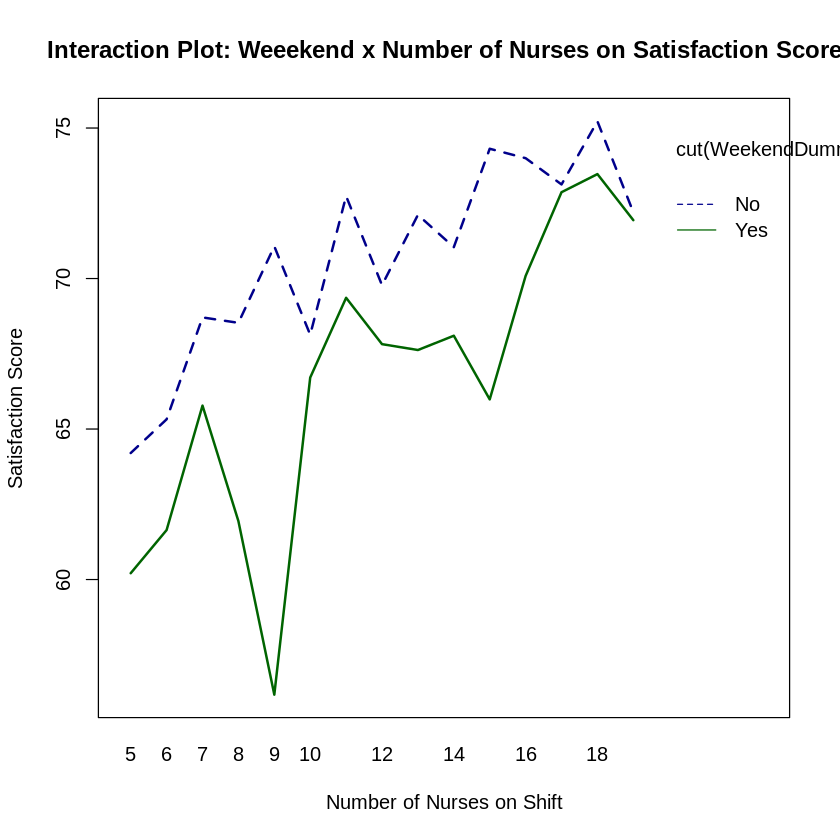

In [39]:
#interaction plot
satisfaction$Nurses_cat <- factor(satisfaction$NursesOnShift)
with(satisfaction,
     interaction.plot(x.factor = Nurses_cat,
                      trace.factor = cut(WeekendDummy,2,labels = c("No", "Yes")),
                      response = SatisfactionScore,
                      main = "Interaction Plot: Weeekend x Number of Nurses on Satisfaction Score",
                      xlab = "Number of Nurses on Shift",
                      ylab = "Satisfaction Score",
                      col = c("darkblue", "darkgreen"),
                      lwd = 2))

b.	The interaction plot shows there is variation in satisfaction score for whether it was or wasn’t a weekend and the number of nurses on shift. The satisfaction score of weekend days and weekend days tend to be lower than when there are fewer nurses on shift. The satisfaction score is higher on the weekdays than on the weekend.

##6. Insights for Hospital Leadership

a. Which factor(s) most strongly affect patient satisfaction?

b. If you could adjust one variable to raise satisfaction, which would it be and why?

c. Suggest one additional variable you’d collect in future studies to improve model accuracy.

a.	The predictor variables that most affect the response variable were the weekend and emergency level as they were both statistically significant and have a higher coefficient values, thus affecting the satisfaction score in higher units negatively. Followed by nurses on shift, which had a positive relationship to the satisfaction score.

b.	If I were to adjust one variable to raise satisfaction, I would recommend increasing the number of nurses on shift as this positively impacts the satisfaction score.

c.	Another variable that could be introduced to improve model accuracy is the average amount of time spent with patients. This may reflect how more amount of time spent between the patient and health care provider may positively affect the satisfaction score.  
